<a href="https://colab.research.google.com/github/UdaykiranSure/Sales_Predictions-time-series-prediction/blob/main/Furniture_Sales_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_excel("/content/Sample - Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
furniture['Order Date'].min(),furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [7]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
furniture.drop('Row ID',axis = 1,inplace = True)
furniture.columns

<ipython-input-8-c8205dec1ec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop('Row ID',axis = 1,inplace = True)


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
index = [ 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(index,axis = 1,inplace = True)

<ipython-input-9-2e064605334d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop(index,axis = 1,inplace = True)


In [10]:
furniture.sort_values("Order Date")

furniture.isnull().sum()

,0
Order Date,0
Sales,0


In [11]:
furniture.groupby('Order Date')['Sales'].sum().reset_index()

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [12]:
furniture.set_index('Order Date',inplace = True)
furniture.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [13]:
y = furniture['Sales'].resample('MS').mean()
y['2017']

,Sales
Order Date,
2017-01-01,248.501333
2017-02-01,264.089900
2017-03-01,286.669600
2017-04-01,206.044502
2017-05-01,319.953928
2017-06-01,372.717386
2017-07-01,227.173500
2017-08-01,395.945487
2017-09-01,349.737422


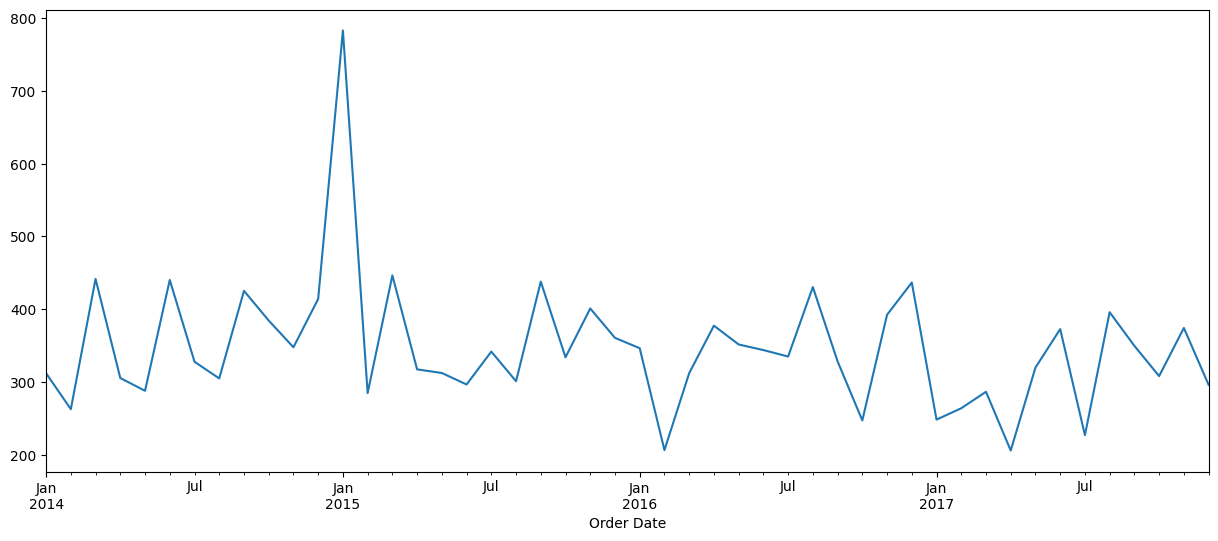

In [14]:
import matplotlib.pyplot as plt
y.plot(figsize = (15,6))
plt.show()

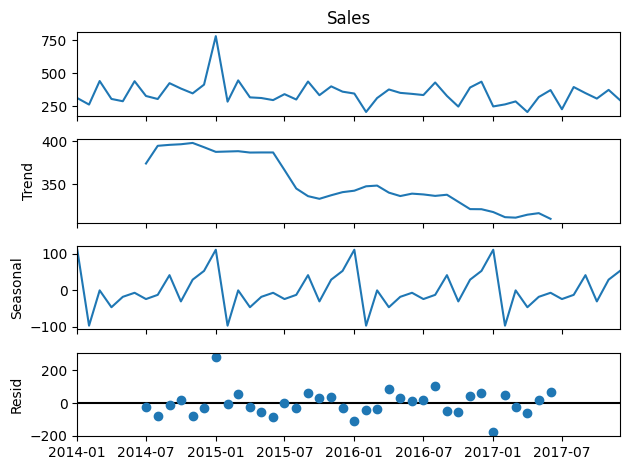

In [15]:
import statsmodels.api as sm
decompose = sm.tsa.seasonal_decompose(y,model = 'additive')
decompose.plot()
plt.show()

In [16]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
for param in pdq:
  for seasonal_param in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y,order = param,seasonal_order = seasonal_param,enforce_stationarity=False,enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, seasonal_param, results.aic))
    except ValueError:
      print('wrong parameters:')
      continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1611.0922033735553
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.2046489859171
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:272.09198476282904
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1325.7043223984153
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.44645647223496
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:274.09198456327755
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680665886


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2641.73659434863
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.549645336461
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:262.52305170476995


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.14321938664324
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2597.985428248429
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.446406625019
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:264.52300131281385
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.638926970597


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1575.444476970495
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:433.3552136704604
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:274.10692957468103
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.46040107889746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1356.693430641829
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.1158452476944
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:276.10533141664445
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:538.8964721447168
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2077.084300376492


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:412.87269899052046
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:251.24707755083693
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:419.1839792724929


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1418.3249112244534
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:273.40324546363354


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:253.2196476461961
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:592.7661498749849


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1226.1480863563586
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427.72411597383274
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:273.5820684371147
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:420.41145389920365


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1398.0098441825478
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:273.5840395565937


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:275.5784303961337
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:553.2719417804883
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1603.310902605729


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:418.52617830891495


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:263.8216777113438
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:422.40035833225227


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1917.905140545859
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:275.47757405308084


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:265.8212105873125
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:566.5211872508684


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1132.259828227973
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:430.33057708179365
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:273.43213783258653
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:397.36689816515604


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1058.4947778850174
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:273.44153987929275


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:275.41278577500145
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:540.6257368397357


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1928.524672786143
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:414.77261730420366


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:252.66134327474623
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:391.83032555558384


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:238.90990924728402
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:263.9371084381289


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:254.642071320218


In [18]:
mod = sm.tsa.statespace.SARIMAX(y,order = (0, 1, 1),seasonal_order = (0, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.aic,results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


251.24707755083693 ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.453     -2.207      0.027      -1.888      -0.112
ma.S.L12      -0.0141      0.171     -0.083      0.934      -0.349       0.320
sigma2      6616.8196   6.85e-05   9.66e+07      0.000    6616.820    6616.820


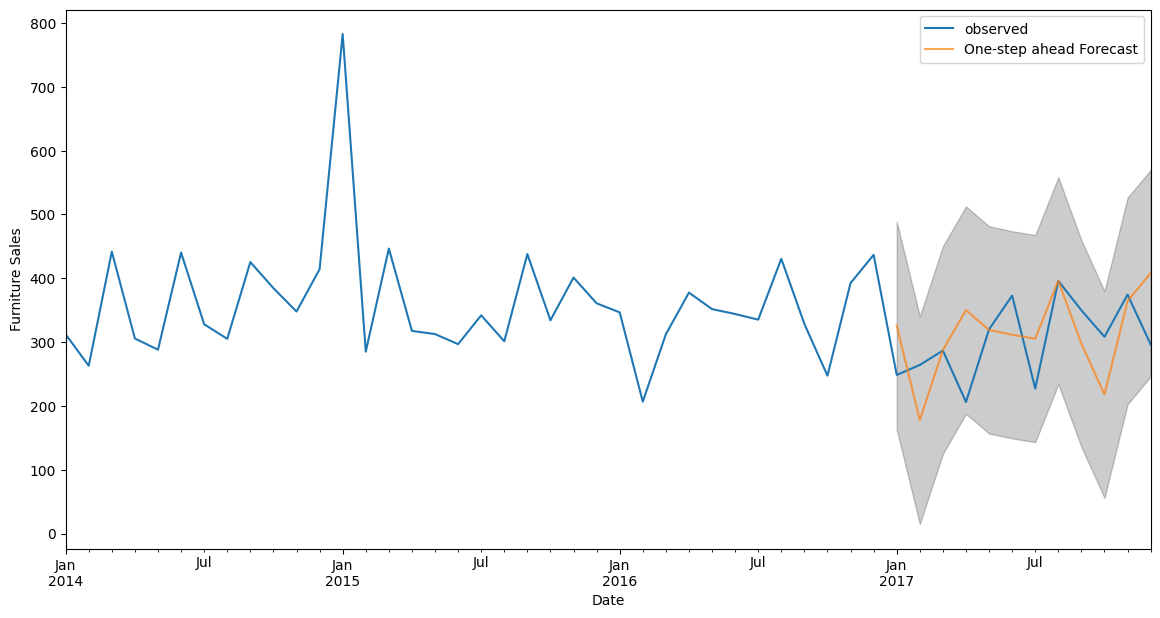

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
rmse = round(np.sqrt(mse),2)
print('The Root Mean Squared Error of our forecasts is {}'.format(rmse))

The Mean Squared Error of our forecasts is 5626.29
The Root Mean Squared Error of our forecasts is 75.01


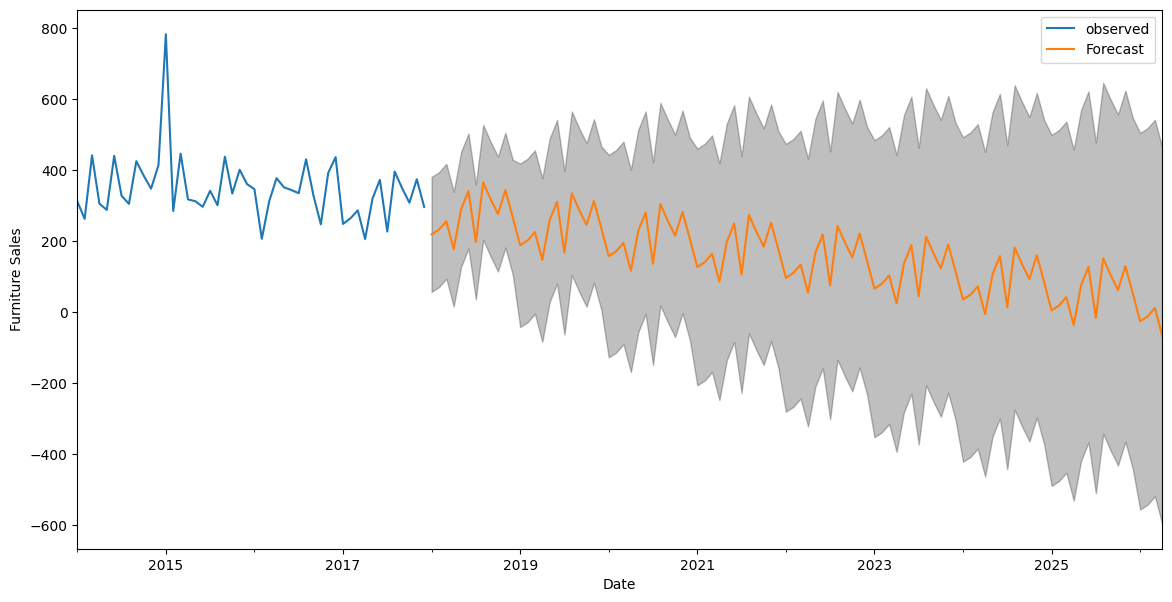

In [21]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

##Time Series Modeling with Prophet


In [22]:
df = pd.read_excel("/content/Sample - Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
office.shape, furniture.shape

((6026, 21), (2121, 21))

In [23]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis = 1, inplace = True)
office.drop(cols,axis = 1, inplace = True)

<ipython-input-23-9ab6d4d29415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.drop(cols,axis = 1, inplace = True)
<ipython-input-23-9ab6d4d29415>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office.drop(cols,axis = 1, inplace = True)


In [24]:
furniture.set_index('Order Date',inplace = True)
office.set_index('Order Date',inplace = True)
furniture.sort_values('Order Date',inplace = True)
office.sort_values('Order Date',inplace = True)
furniture.head(),office.head()

<ipython-input-24-18f6c24dd7d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture.sort_values('Order Date',inplace = True)
<ipython-input-24-18f6c24dd7d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office.sort_values('Order Date',inplace = True)


(               Sales
 Order Date          
 2014-01-06  2573.820
 2014-01-07    76.728
 2014-01-10    51.940
 2014-01-11     9.940
 2014-01-13   545.940,
               Sales
 Order Date         
 2014-01-03   16.448
 2014-01-04  272.736
 2014-01-04   11.784
 2014-01-04    3.540
 2014-01-05   19.536)

In [25]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture.set_index('Order Date',inplace = True)
office.set_index('Order Date',inplace = True)
furniture.head(),office.head()

(               Sales
 Order Date          
 2014-01-06  2573.820
 2014-01-07    76.728
 2014-01-10    51.940
 2014-01-11     9.940
 2014-01-13   879.939,
               Sales
 Order Date         
 2014-01-03   16.448
 2014-01-04  288.060
 2014-01-05   19.536
 2014-01-06  685.340
 2014-01-07   10.430)

In [26]:
y1 = furniture['Sales'].resample('MS').mean()
y2 = office['Sales'].resample('MS').mean()
y1 = pd.DataFrame({'Order Dates': y1.index,'Sales' : y1.values})
y2 = pd.DataFrame({'Order Dates': y2.index,'Sales' : y2.values})
store = y1.merge(y2,how = 'inner',on = 'Order Dates')
store.rename(columns ={'Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace = True)
store.head()



,Order Dates,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


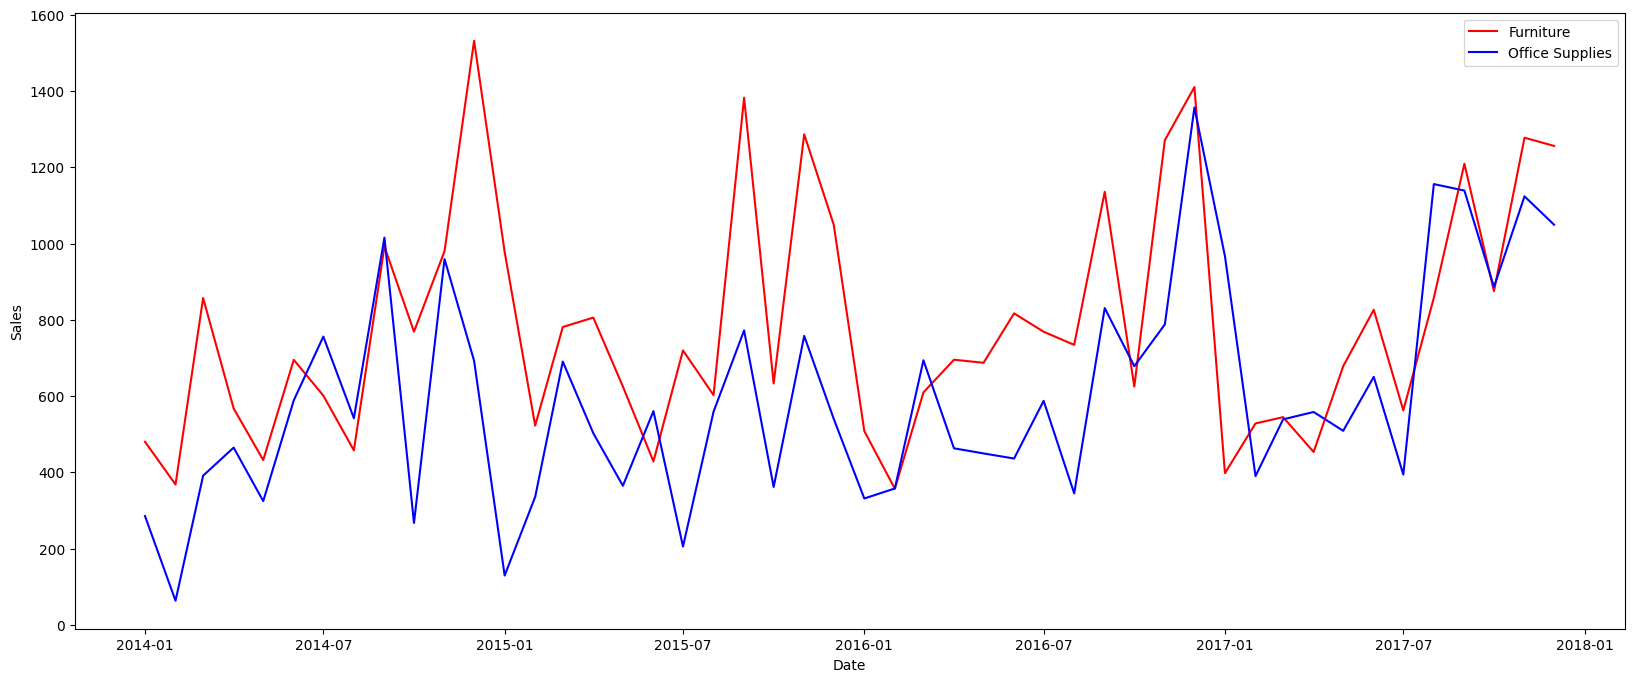

In [27]:
plt.figure(figsize = (20,8))
plt.plot(store['Order Dates'],store['furniture_sales'],'r-',label = 'Furniture')
plt.plot(store["Order Dates"],store['office_sales'],'b-',label = 'Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [28]:
pip install prophet

In [29]:
furniture.reset_index(inplace = True)
office.reset_index(inplace = True)
furniture.head(),office.head()

(  Order Date     Sales
 0 2014-01-06  2573.820
 1 2014-01-07    76.728
 2 2014-01-10    51.940
 3 2014-01-11     9.940
 4 2014-01-13   879.939,
   Order Date    Sales
 0 2014-01-03   16.448
 1 2014-01-04  288.060
 2 2014-01-05   19.536
 3 2014-01-06  685.340
 4 2014-01-07   10.430)

In [34]:
furniture= furniture.rename(columns = {'Order Date':'ds','Sales':'y'})
office= office.rename(columns = {'Order Date':'ds','Sales':'y'})
office.head(),furniture.head()

(          ds        y
 0 2014-01-03   16.448
 1 2014-01-04  288.060
 2 2014-01-05   19.536
 3 2014-01-06  685.340
 4 2014-01-07   10.430,
           ds         y
 0 2014-01-06  2573.820
 1 2014-01-07    76.728
 2 2014-01-10    51.940
 3 2014-01-11     9.940
 4 2014-01-13   879.939)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnoqkipo/sq4ksixk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprnoqkipo/_whrfcj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54431', 'data', 'file=/tmp/tmprnoqkipo/sq4ksixk.json', 'init=/tmp/tmprnoqkipo/_whrfcj0.json', 'output', 'file=/tmp/tmprnoqkipo/prophet_model6r3eq3je/prophet_model-20241108044027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:40:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprn

<Figure size 1800x600 with 0 Axes>

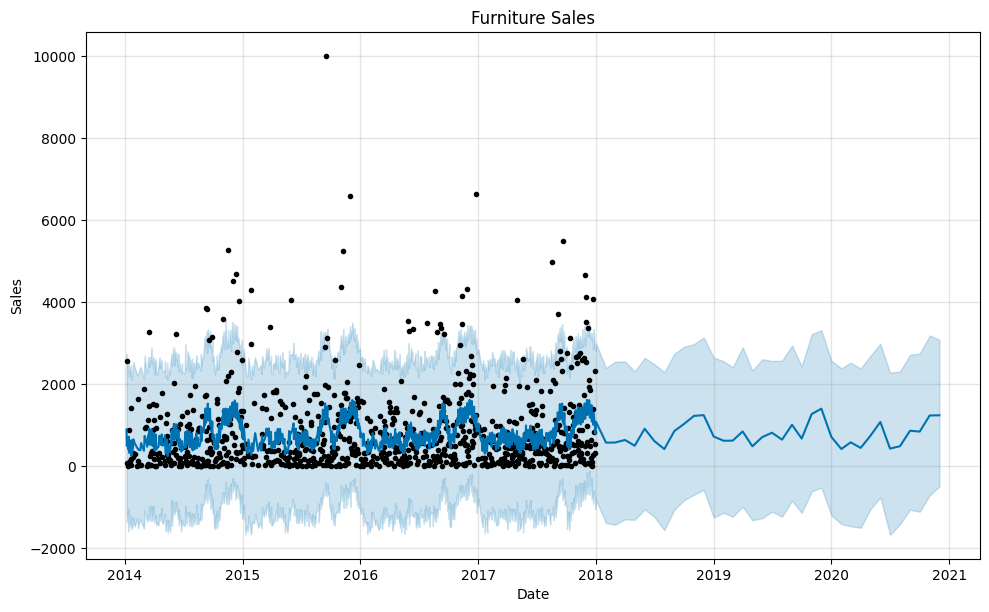

In [35]:
from prophet import Prophet

furniture_model = Prophet(interval_width = 0.95)
furniture_model.fit(furniture)

office_model = Prophet(interval_width = 0.95)
office_model.fit(office)

furniture_forecast = furniture_model.make_future_dataframe(periods = 36,freq = 'MS')
office_forecast = office_model.make_future_dataframe(periods = 36,freq = 'MS')

furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.predict(office_forecast)

plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');


In [36]:
print(furniture_forecast)

            ds       trend   yhat_lower   yhat_upper  trend_lower  \
0   2014-01-06  745.620062 -1108.690148  2736.012002   745.620062   
1   2014-01-07  745.643782 -1363.266499  2489.342412   745.643782   
2   2014-01-10  745.714941 -1119.039759  2420.024570   745.714941   
3   2014-01-11  745.738661 -1591.003599  2278.323370   745.738661   
4   2014-01-13  745.786101 -1029.430093  2522.620923   745.786101   
..         ...         ...          ...          ...          ...   
920 2020-08-01  802.550443 -1412.370653  2314.128829   802.545624   
921 2020-09-01  803.286310 -1060.110582  2715.989946   803.281242   
922 2020-10-01  803.998440 -1107.481057  2749.169483   803.993131   
923 2020-11-01  804.734307  -707.820794  3189.851348   804.728738   
924 2020-12-01  805.446437  -493.576617  3084.829496   805.440588   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     745.620062      152.887757            152.887757            152.887757   
1     745.6

In [47]:
furniture_cols = ['furnitur_%s' % col for col in furniture_forecast.columns]
office_cols = ['office_%s'  % col for col in office_forecast.columns ]

merge_f = furniture_forecast.copy()
merge_o = office_forecast.copy()

merge_f.columns = furniture_cols
merge_o.columns = office_cols
merge = merge_f.merge(merge_o,how = 'inner',left_on = 'furnitur_ds',right_on = 'office_ds')
merge.head()


,furnitur_ds,furnitur_trend,furnitur_yhat_lower,furnitur_yhat_upper,furnitur_trend_lower,furnitur_trend_upper,furnitur_additive_terms,furnitur_additive_terms_lower,furnitur_additive_terms_upper,furnitur_weekly,...,office_weekly,office_weekly_lower,office_weekly_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-06,745.620062,-1108.690148,2736.012002,745.620062,745.620062,152.887757,152.887757,152.887757,234.753073,...,136.186561,136.186561,136.186561,-86.921685,-86.921685,-86.921685,0.0,0.0,0.0,541.340198
1,2014-01-07,745.643782,-1363.266499,2489.342412,745.643782,745.643782,-251.299344,-251.299344,-251.299344,-140.624140,...,-33.115774,-33.115774,-33.115774,-95.048393,-95.048393,-95.048393,0.0,0.0,0.0,363.911747
2,2014-01-10,745.714941,-1119.039759,2420.024570,745.714941,745.714941,-97.942518,-97.942518,-97.942518,93.335275,...,120.859710,120.859710,120.859710,-106.715999,-106.715999,-106.715999,0.0,0.0,0.0,506.221400
3,2014-01-13,745.786101,-1029.430093,2522.620923,745.786101,745.786101,-24.828350,-24.828350,-24.828350,234.753073,...,136.186561,136.186561,136.186561,-102.201175,-102.201175,-102.201175,0.0,0.0,0.0,526.064852
4,2014-01-16,745.857260,-1388.690068,2418.494405,745.857260,745.857260,-257.130636,-257.130636,-257.130636,53.877644,...,59.598298,59.598298,59.598298,-88.364760,-88.364760,-88.364760,0.0,0.0,0.0,463.314779


In [48]:
merge.rename(columns = {'furnitur_ds':'date'},inplace = True)
merge.drop('office_ds',axis = 1,inplace = True)
merge.head()

,date,furnitur_trend,furnitur_yhat_lower,furnitur_yhat_upper,furnitur_trend_lower,furnitur_trend_upper,furnitur_additive_terms,furnitur_additive_terms_lower,furnitur_additive_terms_upper,furnitur_weekly,...,office_weekly,office_weekly_lower,office_weekly_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-06,745.620062,-1108.690148,2736.012002,745.620062,745.620062,152.887757,152.887757,152.887757,234.753073,...,136.186561,136.186561,136.186561,-86.921685,-86.921685,-86.921685,0.0,0.0,0.0,541.340198
1,2014-01-07,745.643782,-1363.266499,2489.342412,745.643782,745.643782,-251.299344,-251.299344,-251.299344,-140.624140,...,-33.115774,-33.115774,-33.115774,-95.048393,-95.048393,-95.048393,0.0,0.0,0.0,363.911747
2,2014-01-10,745.714941,-1119.039759,2420.024570,745.714941,745.714941,-97.942518,-97.942518,-97.942518,93.335275,...,120.859710,120.859710,120.859710,-106.715999,-106.715999,-106.715999,0.0,0.0,0.0,506.221400
3,2014-01-13,745.786101,-1029.430093,2522.620923,745.786101,745.786101,-24.828350,-24.828350,-24.828350,234.753073,...,136.186561,136.186561,136.186561,-102.201175,-102.201175,-102.201175,0.0,0.0,0.0,526.064852
4,2014-01-16,745.857260,-1388.690068,2418.494405,745.857260,745.857260,-257.130636,-257.130636,-257.130636,53.877644,...,59.598298,59.598298,59.598298,-88.364760,-88.364760,-88.364760,0.0,0.0,0.0,463.314779


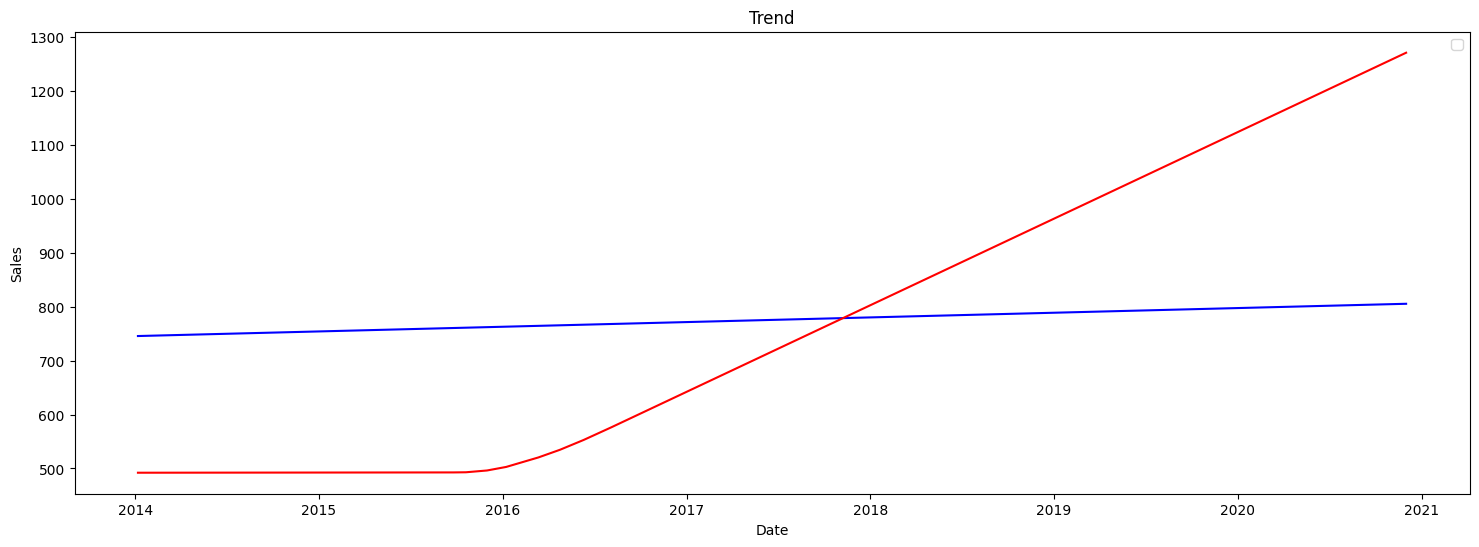

In [53]:
plt.figure(figsize= (18,6))
plt.plot(merge['date'],merge['furnitur_trend'],'b-')
plt.plot(merge['date'],merge['office_trend'],'r-')
plt.xlabel('Date');plt.ylabel('Sales')
plt.title('Trend')
plt.legend()
plt.show()

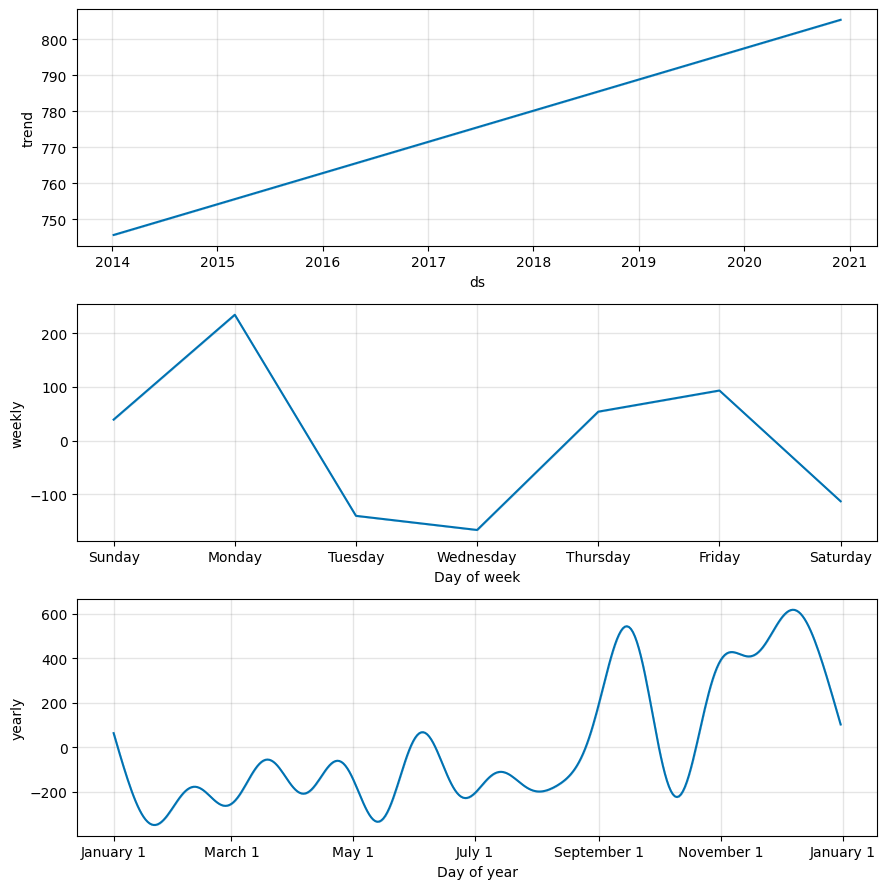

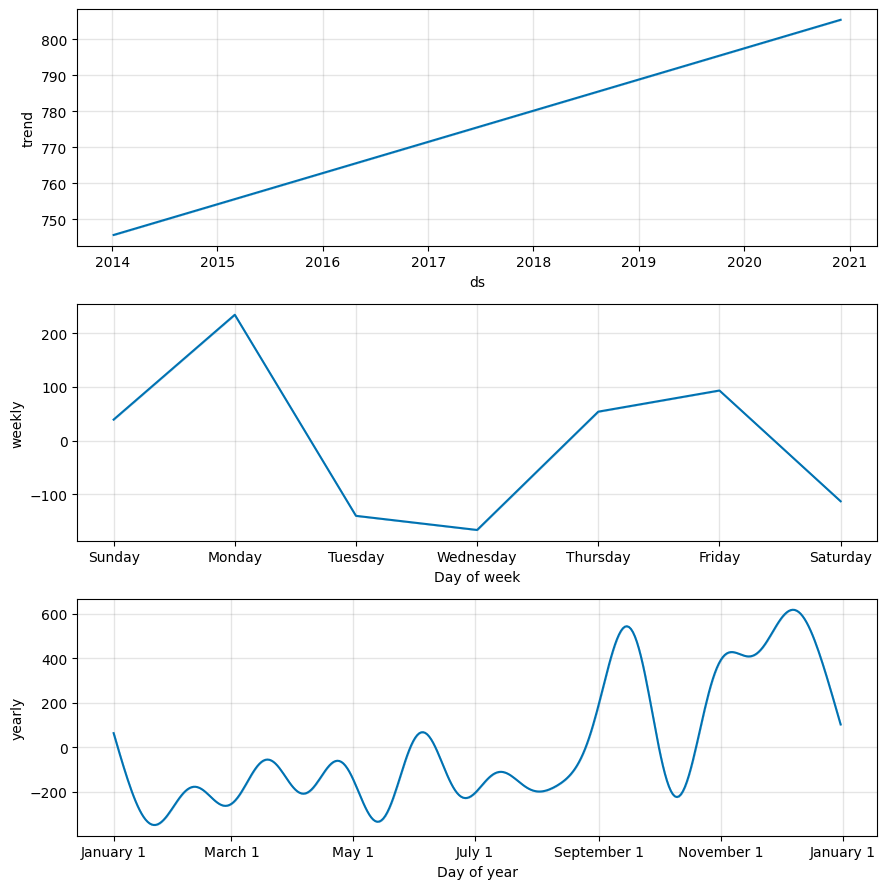

In [55]:
furniture_model.plot_components(furniture_forecast)